In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
import json

# Time in jail analysis

Analysis of the global distribution of time spent in jail, and its distribution relative to other parameters. The objective is to see if some categories of people spend more time in jail, meaning there could already be a bias in the data collected.

In [103]:
file_path = 'data/clean_data.csv' 
df = pd.read_csv(file_path)
df['c_jail_in'] = pd.to_datetime(df['c_jail_in'], format='%d/%m/%Y %H:%M', dayfirst=True)
df['c_jail_out'] = pd.to_datetime(df['c_jail_out'], format='%d/%m/%Y %H:%M', dayfirst=True)
df['duration'] = abs((df['c_jail_out'] - df['c_jail_in']).dt.days) + 0.5
df['duration'] = df['duration'].fillna(0)
df = df[df['is_recid'] != -1]
df = df[df['c_charge_degree'] != '(X)']
df_clean = df.drop(['id', 'c_jail_in', 'c_jail_out', 'dob', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'days_b_screening_arrest', 'r_offense_date', 'r_charge_desc', 'r_jail_in','vr_offense_date','vr_charge_desc','score_text','screening_date','v_decile_score','v_score_text','priors_count.1'], axis=1)

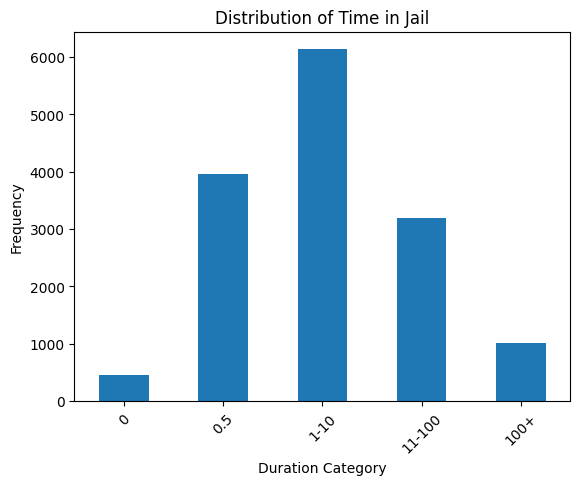

In [104]:
bins = [0, 0.5, 1, 10, 100, float('inf')]
labels = ['0', '0.5', '1-10', '11-100', '100+']

df_clean['duration_cat'] = pd.cut(df_clean['duration'], bins=bins, labels=labels, right=False)
duration_counts = df_clean['duration_cat'].value_counts().sort_index()

duration_counts.plot(kind='bar')
plt.xlabel('Duration Category')
plt.ylabel('Frequency')
plt.title('Distribution of Time in Jail')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

C:\Users\lilac\AppData\Local\Temp\ipykernel_12336\3681563095.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_by_sex = df_clean.groupby(['duration_cat', 'sex']).size().unstack()


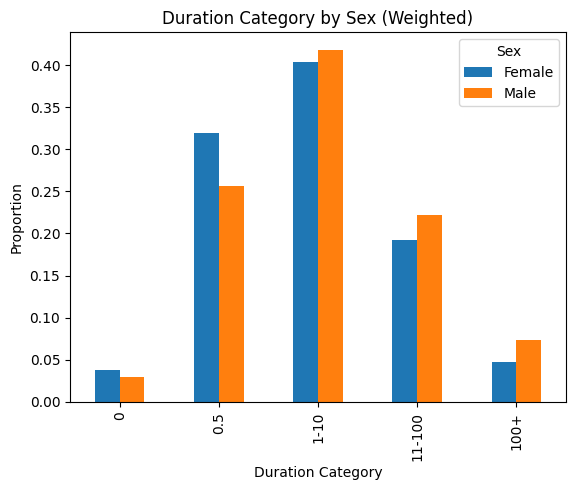

In [105]:
# Count the total number of men and women
total_men = (df_clean['sex'] == 'Male').sum()
total_women = (df_clean['sex'] == 'Female').sum()

# Count occurrences of each duration category by sex
duration_by_sex = df_clean.groupby(['duration_cat', 'sex']).size().unstack()

# Calculate proportions by dividing by total number of men and women
duration_by_sex['Male'] /= total_men
duration_by_sex['Female'] /= total_women

# Plot duration category by sex with weighted proportions
duration_by_sex.plot(kind='bar')
plt.xlabel('Duration Category')
plt.ylabel('Proportion')
plt.title('Duration Category by Sex (Weighted)')
plt.legend(title='Sex')
plt.show()

C:\Users\lilac\AppData\Local\Temp\ipykernel_12336\492054266.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_by_race = df_clean.groupby(['duration_cat', 'race']).size().unstack()


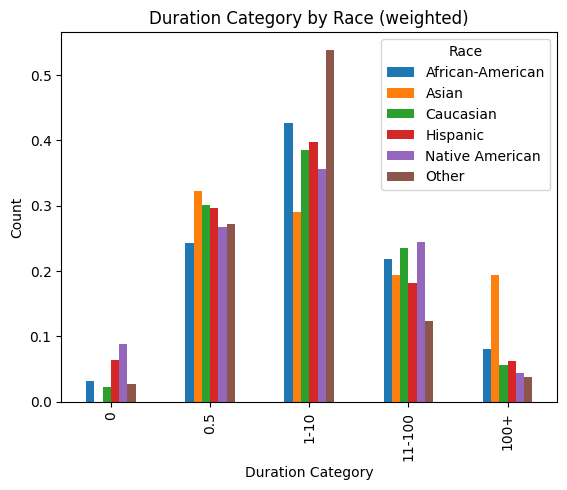

In [106]:
duration_by_race = df_clean.groupby(['duration_cat', 'race']).size().unstack()

duration_by_race['African-American'] /= df_clean['race'].value_counts()['African-American']
duration_by_race['Caucasian'] /= df_clean['race'].value_counts()['Caucasian']
duration_by_race['Hispanic'] /= df_clean['race'].value_counts()['Hispanic']
duration_by_race['Other'] /= df_clean['race'].value_counts()['Other']
duration_by_race['Asian'] /= df_clean['race'].value_counts()['Asian']
duration_by_race['Native American'] /= df_clean['race'].value_counts()['Native American']
duration_by_race.plot(kind='bar')
plt.xlabel('Duration Category')
plt.ylabel('Count')
plt.title('Duration Category by Race (weighted)')
plt.legend(title='Race')
plt.show()

C:\Users\lilac\AppData\Local\Temp\ipykernel_12336\2024374843.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_by_age = df_clean.groupby(['duration_cat', 'age_group']).size().unstack()


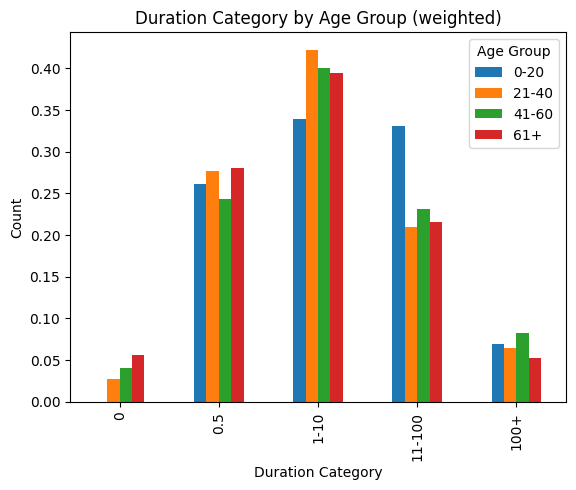

In [107]:
bins = [0, 20, 40, 60, 100]
labels = ['0-20', '21-40', '41-60', '61+']

df_clean['age_group'] = pd.cut(df_clean['age'], bins=bins, labels=labels, right=False)
duration_by_age = df_clean.groupby(['duration_cat', 'age_group']).size().unstack()

duration_by_age['0-20'] /= df_clean['age_group'].value_counts()['0-20']
duration_by_age['21-40'] /= df_clean['age_group'].value_counts()['21-40']
duration_by_age['41-60'] /= df_clean['age_group'].value_counts()['41-60']
duration_by_age['61+'] /= df_clean['age_group'].value_counts()['61+']

duration_by_age.plot(kind='bar')
plt.xlabel('Duration Category')
plt.ylabel('Count')
plt.title('Duration Category by Age Group (weighted)')
plt.legend(title='Age Group')
plt.show()

C:\Users\lilac\AppData\Local\Temp\ipykernel_12336\2157093512.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_by_age_cat = df_clean.groupby(['duration_cat', 'age_cat']).size().unstack()


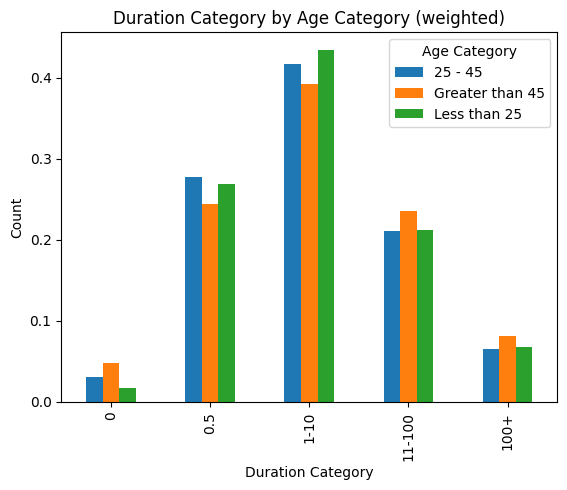

In [108]:
duration_by_age_cat = df_clean.groupby(['duration_cat', 'age_cat']).size().unstack()

duration_by_age_cat['Less than 25'] /= df_clean['age_cat'].value_counts()['Less than 25']
duration_by_age_cat['25 - 45'] /= df_clean['age_cat'].value_counts()['25 - 45']
duration_by_age_cat['Greater than 45'] /= df_clean['age_cat'].value_counts()['Greater than 45']

duration_by_age_cat.plot(kind='bar')
plt.xlabel('Duration Category')
plt.ylabel('Count')
plt.title('Duration Category by Age Category (weighted)')
plt.legend(title='Age Category')
plt.show()

C:\Users\lilac\AppData\Local\Temp\ipykernel_12336\467056968.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_by_degree = df_clean.groupby(['duration_cat', 'c_charge_degree']).size().unstack()


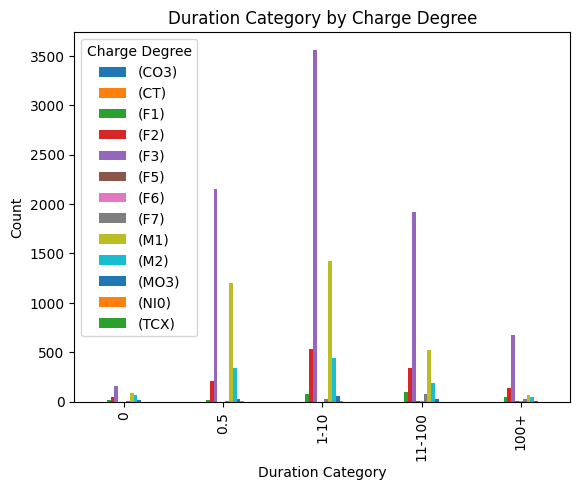

In [109]:
duration_by_degree = df_clean.groupby(['duration_cat', 'c_charge_degree']).size().unstack()

duration_by_degree.plot(kind='bar')
plt.xlabel('Duration Category')
plt.ylabel('Count')
plt.title('Duration Category by Charge Degree')
plt.legend(title='Charge Degree')
plt.show()

# Charges Analysis

In the dataset, we get some informations about the initial charge comitted which led to the screening. We get the degree and a description. We want to analyse if some categories of people are more represented for more severe crimes, which could induce a bias. We also want to see if, for the same crime/crime degree, there is disparities in the time in jail.

We first tried to understand what each charge degree value meant, as some were unclear and it allowed us to drop some lines. To understand them better, we sorted each distinct description by its degree. It allowed us to drop some lines. For each charge of degree X, the description was Nan, which means those lines where lacking information. We dropped them above.

In [110]:
charge_descriptions_by_degree = {
    degree: df_clean[df_clean['c_charge_degree'] == degree]['c_charge_desc'].unique().tolist()
    for degree in df_clean['c_charge_degree'].unique()
}

with open('data/extracted_information/charge_description_by_degree.json', 'w') as f:
    json.dump(charge_descriptions_by_degree, f, indent=4)

In [111]:
total_no_charge = df_clean['c_charge_desc'].value_counts()['arrest case no charge']/df_clean['c_charge_desc'].value_counts().sum()
print(f"Percentage of cases with no charge: {total_no_charge*100:.2f}%")

Percentage of cases with no charge: 17.66%


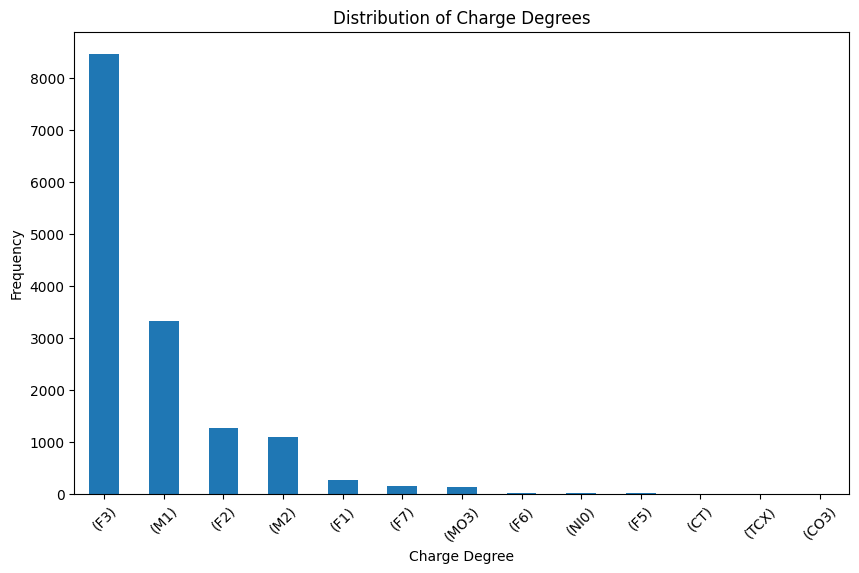

In [112]:
charge_degree_counts = df['c_charge_degree'].value_counts()

plt.figure(figsize=(10, 6))
charge_degree_counts.plot(kind='bar')
plt.title('Distribution of Charge Degrees')
plt.xlabel('Charge Degree')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [113]:
df_clean['c_charge_degree'] = df_clean['c_charge_degree'].astype(str)
df_clean['r_charge_degree'] = df_clean['r_charge_degree'].astype(str)
df_clean['vr_charge_degree'] = df_clean['vr_charge_degree'].astype(str)

In [114]:
def categorize_charge_degree(charge_degree):
    if charge_degree.startswith('(F'):
        return 'Felony'
    elif charge_degree.startswith('(M'):
        return 'Misdemeanor'
    elif charge_degree == 'nan':
        return 'None'
    else:
        return 'Other'

df_clean['c_charge_category'] = df_clean['c_charge_degree'].apply(categorize_charge_degree)
df_clean['r_charge_category'] = df_clean['r_charge_degree'].apply(categorize_charge_degree)
df_clean['vr_charge_category'] = df_clean['vr_charge_degree'].apply(categorize_charge_degree)
df_clean

,name,sex,age,age_cat,race,decile_score,priors_count,c_days_from_compas,c_charge_degree,c_charge_desc,...,r_days_from_arrest,is_violent_recid,vr_charge_degree,event,duration,duration_cat,age_group,c_charge_category,r_charge_category,vr_charge_category
0,miguel hernandez,Male,69,Greater than 45,Other,1,0,1.0,(F3),Aggravated Assault w/Firearm,...,NaN,0,nan,0,0.5,0.5,61+,Felony,None,None
1,miguel hernandez,Male,69,Greater than 45,Other,1,0,1.0,(F3),Aggravated Assault w/Firearm,...,NaN,0,nan,0,0.5,0.5,61+,Felony,None,None
3,kevon dixon,Male,34,25 - 45,African-American,3,0,1.0,(F3),Felony Battery w/Prior Convict,...,NaN,1,(F3),1,10.5,11-100,21-40,Felony,Felony,Felony
4,ed philo,Male,24,Less than 25,African-American,4,4,1.0,(F3),Possession of Cocaine,...,0.0,0,nan,0,1.5,1-10,21-40,Felony,Misdemeanor,None
5,ed philo,Male,24,Less than 25,African-American,4,4,1.0,(F3),Possession of Cocaine,...,0.0,0,nan,0,1.5,1-10,21-40,Felony,Misdemeanor,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15508,malcolm simmons,Male,23,Less than 25,African-American,3,0,1.0,(F3),Leaving the Scene of Accident,...,NaN,0,nan,0,1.5,1-10,21-40,Felony,None,None
15509,alexsandra beauchamps,Female,31,25 - 45,African-American,6,5,1.0,(M1),Battery,...,NaN,0,nan,0,10.5,11-100,21-40,Misdemeanor,None,None
15510,winston gregory,Male,57,Greater than 45,Other,1,0,1.0,(F2),Aggravated Battery / Pregnant,...,NaN,0,nan,0,1.5,1-10,41-60,Felony,None,None
15511,farrah jean,Female,33,25 - 45,African-American,2,3,1.0,(M1),Battery on Law Enforc Officer,...,NaN,0,nan,0,1.5,1-10,21-40,Misdemeanor,None,None


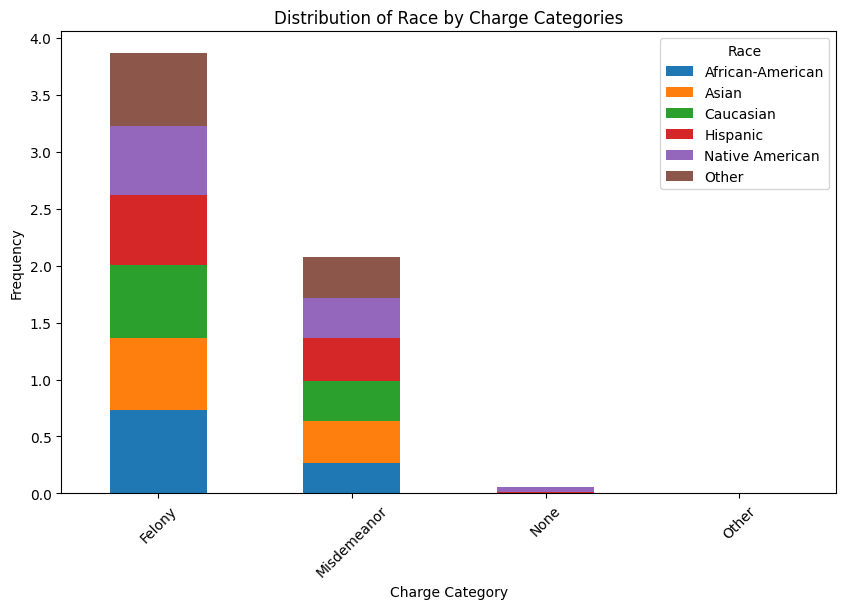

In [115]:
charge_category_by_race = df_clean.groupby(['c_charge_category', 'race']).size().unstack()

charge_category_by_race['African-American'] /= df_clean['race'].value_counts()['African-American']
charge_category_by_race['Caucasian'] /= df_clean['race'].value_counts()['Caucasian']
charge_category_by_race['Hispanic'] /= df_clean['race'].value_counts()['Hispanic']
charge_category_by_race['Other'] /= df_clean['race'].value_counts()['Other']
charge_category_by_race['Asian'] /= df_clean['race'].value_counts()['Asian']
charge_category_by_race['Native American'] /= df_clean['race'].value_counts()['Native American']

# Plot the distribution
charge_category_by_race.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Race by Charge Categories')
plt.xlabel('Charge Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Race')
plt.show()

In [116]:
def categorize_charge_degree(charge_degree):
    if charge_degree.startswith('(F'):
        return 'Felony'
    elif charge_degree.startswith('(M'):
        return 'Misdemeanor'
    else:
        return 'Other'

df['charge_category'] = df['c_charge_degree'].apply(categorize_charge_degree)

df

AttributeError: 'float' object has no attribute 'startswith'